# **Neural Networks to the diagnosis of epileptic seizures**

#### Cognitive Systems: theory and models 
#### CSIM
#### Katherine Robles Martínez de la Vega

## **Mounting data from Google Drive and importing libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### **Loading the data in DataFrames**

*   EEG_D is the dataset from normal recordings (non-ES).
*   EEG_E is the dataset from recordings showing epileptic seizures (ES).

In [2]:
# EEG without ES (GROUP D inside the file "F")
EEG_D = pd.DataFrame()
for i in range(100):
    EEG_D[f"F{'{:03}'.format(i+1)}"] = np.loadtxt(f"/content/drive/MyDrive/Colab Notebooks/CogSys Project/DATA/F/F{'{:03}'.format(i+1)}.txt")

# EEG showing ES (GROUP E inside the file "S")
EEG_E = pd.DataFrame()
for i in range(100):
    EEG_E[f"S{'{:03}'.format(i+1)}"] = np.loadtxt(f"/content/drive/MyDrive/Colab Notebooks/CogSys Project/DATA/S/S{'{:03}'.format(i+1)}.txt")

print(f"Dimensions of EEG_D are {EEG_D.shape}")
print(f"Dimensions of EEG_E are {EEG_E.shape}")

Dimensions of EEG_D are (4097, 100)
Dimensions of EEG_E are (4097, 100)


In [3]:
# Non-ES dataset
EEG_D

,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038,F039,F040,...,F061,F062,F063,F064,F065,F066,F067,F068,F069,F070,F071,F072,F073,F074,F075,F076,F077,F078,F079,F080,F081,F082,F083,F084,F085,F086,F087,F088,F089,F090,F091,F092,F093,F094,F095,F096,F097,F098,F099,F100
0,34.0,60.0,26.0,-41.0,13.0,-15.0,-24.0,23.0,-263.0,59.0,44.0,-23.0,-6.0,-7.0,48.0,-97.0,45.0,-42.0,-72.0,21.0,85.0,26.0,-53.0,18.0,163.0,-3.0,-21.0,36.0,27.0,-142.0,88.0,46.0,-54.0,-11.0,47.0,35.0,37.0,-20.0,-50.0,36.0,...,92.0,-24.0,-50.0,-13.0,51.0,12.0,-28.0,56.0,-50.0,-20.0,-2.0,-33.0,-38.0,26.0,49.0,-183.0,8.0,13.0,-29.0,11.0,36.0,-28.0,8.0,5.0,-37.0,133.0,39.0,-3.0,43.0,18.0,99.0,-131.0,1.0,-41.0,-39.0,45.0,75.0,67.0,5.0,-45.0
1,33.0,47.0,16.0,-42.0,6.0,-2.0,-27.0,17.0,-263.0,52.0,50.0,-31.0,-5.0,-12.0,54.0,-91.0,42.0,-44.0,-78.0,16.0,91.0,29.0,-63.0,18.0,162.0,-3.0,-15.0,30.0,29.0,-142.0,77.0,41.0,-59.0,-11.0,43.0,34.0,58.0,-32.0,-44.0,40.0,...,96.0,-15.0,-51.0,-18.0,38.0,17.0,-35.0,57.0,-54.0,-13.0,0.0,-55.0,-27.0,20.0,54.0,-183.0,0.0,9.0,-23.0,32.0,46.0,-44.0,9.0,-7.0,-41.0,130.0,41.0,0.0,66.0,30.0,114.0,-153.0,-4.0,-41.0,-27.0,52.0,72.0,86.0,2.0,-53.0
2,28.0,38.0,13.0,-48.0,-1.0,0.0,-23.0,10.0,-261.0,51.0,46.0,-34.0,-10.0,-14.0,56.0,-74.0,33.0,-38.0,-90.0,14.0,81.0,26.0,-73.0,20.0,168.0,-7.0,2.0,24.0,31.0,-133.0,69.0,44.0,-60.0,-14.0,34.0,34.0,70.0,-35.0,-37.0,40.0,...,96.0,-5.0,-50.0,-16.0,34.0,14.0,-37.0,53.0,-56.0,51.0,1.0,-78.0,-4.0,20.0,62.0,-182.0,2.0,15.0,-1.0,35.0,57.0,-63.0,10.0,-9.0,-46.0,128.0,41.0,5.0,102.0,41.0,122.0,-177.0,-6.0,-48.0,-16.0,79.0,72.0,99.0,-6.0,-51.0
3,22.0,29.0,12.0,-48.0,-13.0,2.0,-28.0,10.0,-258.0,46.0,43.0,-40.0,-12.0,-21.0,64.0,-53.0,27.0,-51.0,-93.0,11.0,77.0,22.0,-87.0,26.0,196.0,-3.0,19.0,17.0,30.0,-126.0,56.0,39.0,-63.0,-18.0,24.0,34.0,81.0,-52.0,-35.0,39.0,...,92.0,-1.0,-41.0,-22.0,48.0,8.0,-39.0,54.0,-52.0,174.0,4.0,-81.0,8.0,25.0,72.0,-180.0,8.0,19.0,22.0,44.0,60.0,-85.0,11.0,-23.0,-50.0,119.0,42.0,4.0,139.0,57.0,132.0,-194.0,-15.0,-48.0,-3.0,117.0,80.0,109.0,-4.0,-52.0
4,21.0,28.0,17.0,-48.0,-29.0,-2.0,-34.0,7.0,-258.0,43.0,43.0,-43.0,-8.0,-31.0,64.0,-25.0,23.0,-35.0,-99.0,0.0,53.0,18.0,-78.0,32.0,236.0,-10.0,43.0,6.0,24.0,-123.0,45.0,42.0,-63.0,-19.0,17.0,26.0,80.0,-57.0,-38.0,42.0,...,90.0,4.0,-35.0,-29.0,52.0,4.0,-32.0,49.0,-59.0,329.0,7.0,-69.0,21.0,19.0,72.0,-183.0,9.0,35.0,50.0,46.0,61.0,-94.0,8.0,-27.0,-47.0,99.0,43.0,6.0,161.0,72.0,151.0,-204.0,-8.0,-44.0,17.0,146.0,81.0,115.0,-9.0,-54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,40.0,209.0,113.0,-23.0,167.0,-52.0,-70.0,34.0,-314.0,109.0,-1.0,26.0,68.0,6.0,2.0,-10.0,9.0,110.0,-35.0,71.0,-85.0,69.0,101.0,-79.0,-45.0,-13.0,-47.0,-48.0,99.0,-192.0,176.0,-88.0,21.0,45.0,1.0,38.0,6.0,45.0,-110.0,-1.0,...,92.0,-56.0,-39.0,77.0,-81.0,-9.0,4.0,31.0,-13.0,27.0,-14.0,6.0,-104.0,-92.0,17.0,-221.0,-80.0,-83.0,-86.0,-40.0,3.0,64.0,-57.0,42.0,-16.0,121.0,49.0,22.0,5.0,4.0,55.0,-38.0,-25.0,16.0,-30.0,-9.0,-46.0,18.0,31.0,-24.0
4093,45.0,177.0,119.0,-28.0,175.0,-53.0,-67.0,42.0,-319.0,110.0,-4.0,27.0,55.0,7.0,-1.0,-36.0,3.0,117.0,-35.0,74.0,-105.0,65.0,107.0,-81.0,-21.0,-15.0,-41.0,-40.0,88.0,-201.0,190.0,-92.0,21.0,44.0,-1.0,48.0,2.0,50.0,-106.0,-1.0,...,102.0,-60.0,-30.0,79.0,-91.0,0.0,5.0,25.0,-9.0,23.0,-16.0,13.0,-90.0,-103.0,8.0,-222.0,-85.0,-84.0,-90.0,-44.0,0.0,45.0,-54.0,47.0,-22.0,127.0,58.0,23.0,11.0,-2.0,75.0,-37.0,-13.0,19.0,-22.0,0.0,-56.0,16.0,39.0,-22.0
4094,39.0,149.0,114.0,-30.0,161.0,-44.0,-57.0,41.0,-316.0,109.0,-3.0,26.0,43.0,-1.0,1.0,-58.0,7.0,104.0,-43.0,73.0,-92.0,49.0,94.0,-55.0,12.0,-9.0,-37.0,-26.0,72.0,-200.0,176.0,-84.0,13.

In [4]:
# Dataset showing ES
EEG_E

,S001,S002,S003,S004,S005,S006,S007,S008,S009,S010,S011,S012,S013,S014,S015,S016,S017,S018,S019,S020,S021,S022,S023,S024,S025,S026,S027,S028,S029,S030,S031,S032,S033,S034,S035,S036,S037,S038,S039,S040,...,S061,S062,S063,S064,S065,S066,S067,S068,S069,S070,S071,S072,S073,S074,S075,S076,S077,S078,S079,S080,S081,S082,S083,S084,S085,S086,S087,S088,S089,S090,S091,S092,S093,S094,S095,S096,S097,S098,S099,S100
0,100.0,340.0,-310.0,84.0,343.0,-88.0,176.0,661.0,-377.0,374.0,142.0,457.0,746.0,-63.0,-174.0,-115.0,800.0,-46.0,-501.0,1.0,213.0,-54.0,27.0,-40.0,-445.0,231.0,-782.0,-345.0,59.0,475.0,-156.0,-9.0,216.0,-18.0,-458.0,258.0,530.0,264.0,-71.0,284.0,...,-192.0,249.0,224.0,22.0,-300.0,-358.0,555.0,-114.0,68.0,-62.0,61.0,271.0,-133.0,-21.0,45.0,-985.0,122.0,-177.0,-459.0,249.0,235.0,-127.0,-34.0,-24.0,184.0,43.0,286.0,80.0,151.0,134.0,-129.0,-26.0,308.0,-155.0,-113.0,-40.0,187.0,-438.0,-476.0,23.0
1,124.0,353.0,93.0,75.0,311.0,-115.0,186.0,721.0,-379.0,-205.0,262.0,420.0,692.0,-107.0,-392.0,-117.0,839.0,-43.0,-540.0,-47.0,210.0,-26.0,55.0,-187.0,-645.0,214.0,-1221.0,-166.0,37.0,501.0,-74.0,68.0,182.0,-55.0,-669.0,309.0,523.0,372.0,-83.0,358.0,...,-207.0,218.0,199.0,-67.0,-334.0,-378.0,611.0,-248.0,-106.0,-87.0,42.0,291.0,-181.0,-17.0,51.0,-594.0,117.0,-237.0,-778.0,235.0,168.0,-164.0,-11.0,-29.0,-160.0,59.0,251.0,86.0,25.0,390.0,-309.0,1.0,367.0,-283.0,-185.0,-58.0,44.0,-561.0,-518.0,144.0
2,153.0,400.0,494.0,21.0,284.0,-140.0,189.0,702.0,-396.0,-871.0,382.0,344.0,562.0,-208.0,-470.0,-127.0,857.0,-37.0,-523.0,-100.0,210.0,20.0,75.0,-254.0,-652.0,187.0,-1406.0,91.0,25.0,477.0,51.0,195.0,146.0,-126.0,-914.0,308.0,424.0,410.0,-95.0,122.0,...,-202.0,176.0,149.0,-184.0,-341.0,-365.0,658.0,-388.0,-149.0,-129.0,23.0,267.0,-166.0,-16.0,62.0,-120.0,116.0,-266.0,-981.0,220.0,113.0,-184.0,8.0,-17.0,-569.0,69.0,214.0,91.0,-82.0,446.0,-432.0,29.0,413.0,-456.0,-269.0,-75.0,-147.0,-622.0,-521.0,228.0
3,185.0,470.0,789.0,-68.0,274.0,-159.0,198.0,628.0,-448.0,-1325.0,451.0,272.0,400.0,-310.0,-398.0,-142.0,876.0,-32.0,-489.0,-192.0,212.0,58.0,90.0,-287.0,-562.0,141.0,-1288.0,326.0,18.0,403.0,134.0,207.0,128.0,-202.0,-999.0,271.0,285.0,382.0,-88.0,-114.0,...,-202.0,137.0,67.0,-281.0,-342.0,-338.0,703.0,-484.0,-141.0,-169.0,-1.0,196.0,-46.0,-15.0,72.0,308.0,110.0,-286.0,-1048.0,286.0,97.0,-209.0,-42.0,-5.0,-758.0,73.0,195.0,100.0,-134.0,329.0,-412.0,41.0,429.0,-541.0,-328.0,-88.0,-368.0,-581.0,-362.0,260.0
4,210.0,538.0,798.0,-138.0,260.0,-164.0,205.0,519.0,-476.0,-1291.0,452.0,198.0,238.0,-395.0,-259.0,-158.0,893.0,-18.0,-539.0,-252.0,194.0,83.0,102.0,-309.0,-496.0,82.0,-944.0,448.0,16.0,303.0,208.0,265.0,116.0,-238.0,-846.0,199.0,157.0,323.0,-48.0,-311.0,...,-139.0,88.0,-37.0,-410.0,-306.0,-296.0,711.0,-565.0,-109.0,-208.0,-23.0,55.0,131.0,-9.0,82.0,620.0,101.0,-301.0,-734.0,424.0,97.0,-223.0,-131.0,0.0,-610.0,65.0,181.0,107.0,-102.0,49.0,-278.0,33.0,400.0,-474.0,-312.0,-89.0,-550.0,-460.0,-68.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,7.0,829.0,-735.0,-234.0,515.0,153.0,100.0,7.0,-93.0,711.0,-299.0,-237.0,-89.0,-32.0,231.0,-10.0,-649.0,-146.0,637.0,102.0,-8.0,-575.0,-648.0,483.0,313.0,333.0,109.0,-467.0,569.0,109.0,-455.0,-186.0,412.0,-222.0,301.0,59.0,272.0,-67.0,93.0,83.0,...,104.0,325.0,-63.0,214.0,-133.0,12.0,339.0,494.0,554.0,-16.0,360.0,-279.0,208.0,-276.0,-21.0,-926.0,-124.0,-44.0,-6.0,228.0,391.0,41.0,-289.0,-10.0,763.0,-66.0,441.0,43.0,5.0,-104.0,-44.0,-205.0,-1547.0,93.0,141.0,-3.0,748.0,40.0,224.0,-272.0
4093,26.0,722.0,-847.0,-238.0,527.0,150.0,98.0,5.0,-82.0,698.0,-253.0,-247.0,310.0,56.0,217.0,-10.0,-798.0,-129.0,521.0,82.0,-9.0,-532.0,-569.0,520.0,294.0,290.0,221.0,-532.0,501.0,95.0,-501.0,-154.0,402.0,-224.0,475.0,59.0,307.0,-35.0,105.0,24.0,..

### **Examples of EEG signals segments**

Text(0.5, 0, 'Samples')

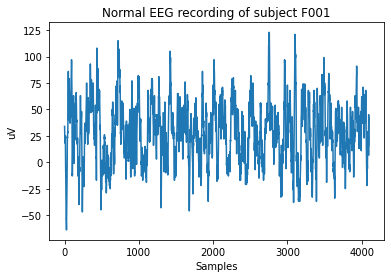

In [5]:
# Example of a normal EEG recording
plt.plot(EEG_D['F001'])
plt.title('Normal EEG recording of subject F001')
plt.ylabel('uV')
plt.xlabel('Samples')

Text(0.5, 0, 'Samples')

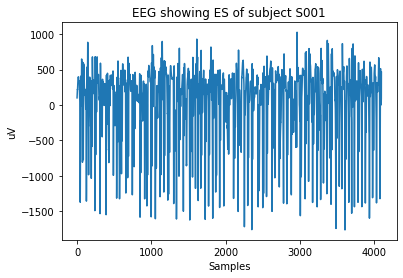

In [6]:
# Example of an EEG recording detecting ES
plt.plot(EEG_E['S001'])
plt.title('EEG showing ES of subject S001')
plt.ylabel('uV')
plt.xlabel('Samples')

## **Data pre-processing**

### **Band-pass filter**

In [7]:
from scipy import signal

# Butterworth filter
fs = 173.61     # Sampling rate
wp = [0.5, 40]  # Band-pass
ws = [0.1, 50]  # Stop-band
N, Wn = signal.buttord(wp, ws, 3, 20, fs=fs)
b, a = signal.butter(N, Wn, 'bandpass', fs=fs)

In [8]:
EEG_D_filtered = pd.DataFrame()
EEG_E_filtered = pd.DataFrame()
for i in range(100):
    EEG_D_filtered[f"F{'{:03}'.format(i+1)}"] = signal.lfilter(b, a, EEG_D[f"F{'{:03}'.format(i+1)}"])

for i in range(100):
    EEG_E_filtered[f"S{'{:03}'.format(i+1)}"] = signal.lfilter(b, a, EEG_E[f"S{'{:03}'.format(i+1)}"])

### **Power Spectral Density (PSD)**

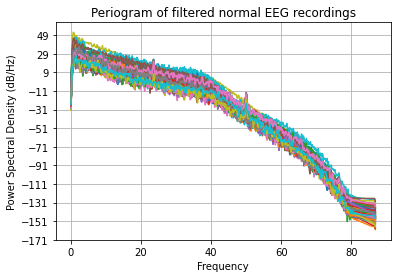

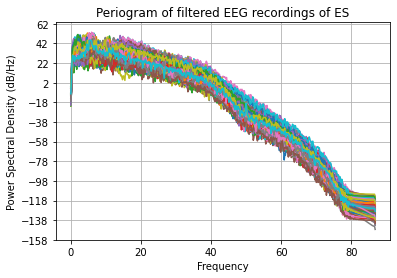

In [9]:
PSD_EEG_D = pd.DataFrame() # It contains the filtered dataset of Group D
PSD_EEG_E = pd.DataFrame() # It contains the filtered dataset of Group E
freqs = pd.DataFrame()     # Frequencies of the data 
NFFT = 1024

# Representation (periogram) of normal EEG recordings after applying the band-pass filter
plt.figure()
for i in range(100):
    [PSD_EEG_D[f"F{'{:03}'.format(i+1)}"],freqs[f"F{'{:03}'.format(i+1)}"]] = plt.psd(EEG_D_filtered[f"F{'{:03}'.format(i+1)}"], NFFT, fs)
plt.title('Periogram of filtered normal EEG recordings')

# Representation (periogram) of EEG recordings of ES after applying the band-pass filter
plt.figure()    
for i in range(100):
    [PSD_EEG_E[f"S{'{:03}'.format(i+1)}"],freqs[f"S{'{:03}'.format(i+1)}"]] = plt.psd(EEG_E_filtered[f"S{'{:03}'.format(i+1)}"], NFFT, fs)    
plt.title('Periogram of filtered EEG recordings of ES')

# Changing the scale to dB since the PSD given by the function plt.psd() is not in a dB scale.
for i in range(100):
    PSD_EEG_D[f"F{'{:03}'.format(i+1)}"] = 10*np.log10(PSD_EEG_D[f"F{'{:03}'.format(i+1)}"])
    PSD_EEG_E[f"S{'{:03}'.format(i+1)}"] = 10*np.log10(PSD_EEG_E[f"S{'{:03}'.format(i+1)}"])


Examples of one only patient. The next images show periograms of EEG signals before and after Band-pass filter

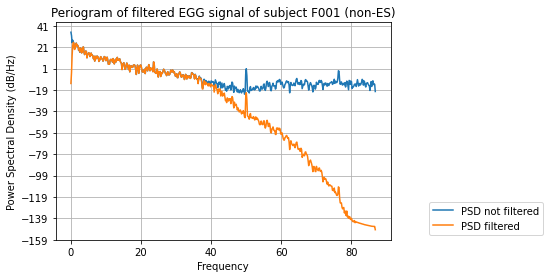

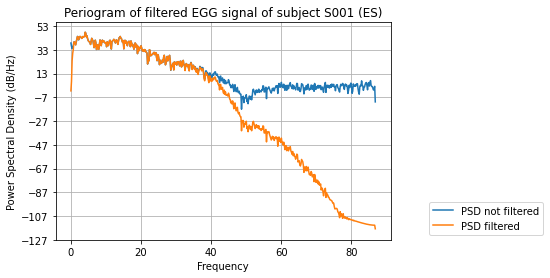

In [10]:
# Periogram of EEG signal F001 (non-ES) BEFORE Band-pass filter
plt.figure()
PSD_EEG_F001 = plt.psd(EEG_D['F001'], NFFT, fs, label='PSD not filtered')
plt.title('Periogram of EGG signal of subject F001 (non-ES) without Band-pass filter')

# Periogram of EEG signal F001 (non-ES) AFTER Band-pass filter
filtered_EEG = signal.lfilter(b, a, EEG_D['F001'])
PSD_EEG_F001 = plt.psd(filtered_EEG, NFFT, fs, label='PSD filtered')
plt.title('Periogram of filtered EGG signal of subject F001 (non-ES)')
plt.legend(bbox_to_anchor=(1.47, 0), loc='lower right')

# Periogram of EEG signal S001 (ES) BEFORE Band-pass filter
plt.figure()
PSD_EEG_S001 = plt.psd(EEG_E['S001'], NFFT, fs, label='PSD not filtered')
plt.title('Periogram of EGG signal of subject S001 (ES) without Band-pass filter')

# Periogram of EEG signal S001 (ES) AFTER Band-pass filter
filtered_EEG = signal.lfilter(b, a, EEG_E['S001'])
PSD_EEG_S001 = plt.psd(filtered_EEG, NFFT, fs, label='PSD filtered')
plt.title('Periogram of filtered EGG signal of subject S001 (ES)')
plt.legend(bbox_to_anchor=(1.47, 0), loc='lower right')

In [11]:
# Conversion from columns to rows
PSD_Data = pd.concat([(PSD_EEG_D.T).iloc[0:100,:],(PSD_EEG_E.T).iloc[0:100,:]])

# Splitting data to training, evaluation and testing
PSD_train = pd.concat([PSD_Data.iloc[0:80,:],PSD_Data.iloc[100:180,:]])  # data for training
PSD_eval = pd.concat([PSD_Data.iloc[80:95,:],PSD_Data.iloc[180:195,:]])  # data for evaluation
PSD_test = pd.concat([PSD_Data.iloc[95:100,:],PSD_Data.iloc[195:200,:]]) # data for testing

PSD_train_cv = pd.concat([PSD_Data.iloc[0:95,:],PSD_Data.iloc[100:195,:]]) # data for using cross validation method

### **Data normalization**

In [12]:
from sklearn import preprocessing

# Normalization of datasets stored in the PSD dataframes
min_max_scaler = preprocessing.MinMaxScaler()

# Data for training
PSD_train_scaled = min_max_scaler.fit_transform(PSD_train)
PSD_train = pd.DataFrame(PSD_train_scaled)

# Data for using cross validation method
PSD_train_cv_scaled = min_max_scaler.fit_transform(PSD_train_cv)
PSD_train_cv = pd.DataFrame(PSD_train_cv_scaled)

# Data for evaluation
PSD_eval_scaled = min_max_scaler.fit_transform(PSD_eval)
PSD_eval = pd.DataFrame(PSD_eval_scaled)

# Data for testing
PSD_test_scaled = min_max_scaler.fit_transform(PSD_test)
PSD_test = pd.DataFrame(PSD_test_scaled)

print(f"Data dimension for training is: {PSD_train.shape}")
print(f"Data dimension for cross validation is: {PSD_train_cv.shape}")
print(f"Data dimension for evaluating is: {PSD_eval.shape}")
print(f"Data dimension for testing is: {PSD_test.shape}")

Data dimension for training is: (160, 513)
Data dimension for cross validation is: (190, 513)
Data dimension for evaluating is: (30, 513)
Data dimension for testing is: (10, 513)


In [13]:
# Now, the data are normalized, eg., PSD_train
PSD_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512
0,0.525290,0.418435,0.352434,0.290693,0.256967,0.325582,0.041091,0.092589,0.334202,0.286307,0.214771,0.170210,0.172735,0.078019,0.222193,0.182072,0.277221,0.242590,0.096179,0.155880,0.338898,0.245602,0.101236,0.062253,0.130599,0.221813,0.212546,0.063278,0.084897,0.032960,0.128628,0.075852,0.008489,0.026049,0.131933,0.087327,0.129757,0.118520,0.027118,0.047363,...,0.162481,0.095215,0.159551,0.185828,0.181346,0.164697,0.160805,0.179608,0.189008,0.174476,0.188239,0.193450,0.184136,0.188449,0.191177,0.195430,0.190741,0.194338,0.196494,0.197122,0.199752,0.199417,0.202558,0.204093,0.205805,0.207961,0.209871,0.211984,0.214071,0.216162,0.218225,0.220241,0.222146,0.223917,0.225507,0.226876,0.227987,0.228807,0.229310,0.229479
1,0.733977,0.895691,0.885124,0.759345,0.673682,0.550218,0.693817,0.732629,0.684484,0.680141,0.733321,0.530323,0.561970,0.612502,0.522480,0.532439,0.549021,0.408671,0.436535,0.456197,0.479554,0.392070,0.479044,0.463314,0.444566,0.501880,0.487807,0.441542,0.355287,0.353719,0.399487,0.388558,0.418058,0.392756,0.501277,0.412468,0.430772,0.409309,0.331815,0.289439,...,0.558316,0.517306,0.564862,0.567748,0.553767,0.567734,0.548335,0.558939,0.561686,0.550465,0.555530,0.553069,0.549238,0.544599,0.543177,0.539823,0.531626,0.529544,0.524133,0.519313,0.514274,0.508426,0.503385,0.497550,0.491561,0.485512,0.479113,0.472612,0.465893,0.459044,0.452097,0.445144,0.438273,0.431638,0.425418,0.419832,0.415123,0.411535,0.409283,0.408515
2,0.481446,0.439037,0.364535,0.269658,0.302822,0.427939,0.296620,0.436614,0.743733,0.640416,0.696984,0.481903,0.330194,0.418695,0.315965,0.354508,0.106786,0.342320,0.313911,0.329507,0.428644,0.264730,0.217560,0.284104,0.159863,0.281971,0.341674,0.317897,0.302358,0.258214,0.322797,0.192011,0.191255,0.253926,0.415387,0.347330,0.248939,0.352974,0.411846,0.374774,...,0.270024,0.178868,0.262430,0.280788,0.244596,0.282749,0.238332,0.272049,0.283729,0.267940,0.273663,0.286053,0.282197,0.277719,0.287101,0.288578,0.283984,0.290349,0.290308,0.292458,0.294624,0.295842,0.298313,0.300287,0.302411,0.304755,0.306929,0.309284,0.311571,0.313874,0.316105,0.318271,0.320305,0.322182,0.323858,0.325295,0.326455,0.327309,0.327831,0.328007
3,0.259375,0.225631,0.283693,0.191864,0.115662,0.291788,0.234749,0.323501,0.503130,0.406015,0.228769,0.163598,0.244952,0.256091,0.383369,0.402275,0.414807,0.419806,0.311927,0.366049,0.379687,0.239622,0.283313,0.391261,0.377918,0.334700,0.340272,0.317376,0.206882,0.188669,0.226330,0.211291,0.161043,0.165361,0.237135,0.201080,0.285350,0.333407,0.292935,0.066250,...,0.166606,0.141494,0.197728,0.199145,0.198969,0.204077,0.193230,0.195275,0.235825,0.203198,0.227079,0.230367,0.229148,0.229713,0.236171,0.244075,0.237792,0.245930,0.248932,0.251779,0.255278,0.258141,0.262516,0.265557,0.269215,0.272819,0.276301,0.279871,0.283299,0.286660,0.289876,0.292938,0.295776,0.298359,0.300641,0.302577,0.304131,0.305267,0.305959,0.306192
4,0.628589,0.537359,0.391697,0.414833,0.323516,0.417984,0.242803,0.396270,0.662415,0.506857,0.561925,0.428729,0.497707,0.547245,0.492255,0.446344,0.484198,0.625961,0.471412,0.467390,0.571197,0.492710,0.481736,0.382373,0.348027,0.417735,0.388268,0.402414,0.414633,0.404976,0.382642,0.304665,0.310425,0.370766,0.490855,0.418355,0.259491,0.402147,0.449708,0.437108,...,0.354855,0.284842,0.350724,0.323105,0.364194,0.334350,0.344571,0.349777,0.360563,0.352894,0.365053,0.360251,0.365923,0.365991,0.368380,0.372617,0.369706,0.374316,0.375224,0.376859,0.379375,0.380799,0.383207,0.385396,0.387560,0.389958,0.392152,0.394537,0.396834,0.399125,0.401337,0.403471,0.405468,0.407301,0.408932,0.410325,0.411448,0.412272,0.412776,0.412946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## **Output labels**
Before training the model, it is required to designate the corresponding output label to each EEG signal, being that: 

> *   **0** means *non-ES*
> *   **1** means *ES*





In [14]:
# Create outputs for training the model
Y_0_train = pd.Series([0 for x in range(80)])
Y_1_train = pd.Series([1 for x in range(80)])
Y_train = pd.concat([Y_0_train,Y_1_train])
Y_train.index = range(Y_train.shape[0]) # Adjust of concatenation index in order to follow the order and not get started (0 to 159, not 0 to 80 and 0 to 80)

# Create outputs for cross validation
Y_0_train_cv = pd.Series([0 for x in range(95)])
Y_1_train_cv = pd.Series([1 for x in range(95)])
Y_train_cv = pd.concat([Y_0_train_cv,Y_1_train_cv])
Y_train_cv.index = range(Y_train_cv.shape[0]) # Adjust of concatenation index

# Create outputs to evaluate the model
Y_0_eval = pd.Series([0 for x in range(15)])
Y_1_eval = pd.Series([1 for x in range(15)])
Y_eval = pd.concat([Y_0_eval,Y_1_eval])
Y_eval.index = range(Y_eval.shape[0]) # Adjust of concatenation index

# Create outputs for testing the model
Y_0_test = pd.Series([0 for x in range(5)])
Y_1_test = pd.Series([1 for x in range(5)])
Y_test = pd.concat([Y_0_test,Y_1_test])
Y_test.index = range(Y_test.shape[0]) # Adjust of concatenation index


# Define the output labels
output_label = {
    'non-ES' : 0,
    'ES'     : 1
}

# Maps indices to output labels
output_to_label = dict((out,label) for label,out in output_label.items())

## **The model: Multilayer Perceptron (MLP)**

MLP has been used to solve classification problems. MLP is created twice, in the second one the objective was to use the k-fold Cross-validation method.

In [15]:
import tensorflow as tf
import tensorflow.keras as kr

lr = 0.07             # learning rate
nn = [513, 16, 8, 1]  # amount of neurons by layer

model_mlp = kr.Sequential() # Object that will contain the neural network as layers sequence

l1 = model_mlp.add(kr.layers.Dense(nn[1], input_dim=nn[0],  activation='relu')) # Adding the first hidden layer
l2 = model_mlp.add(kr.layers.Dense(nn[2], activation='relu'))                   # Adding the second hidden layer
l3 = model_mlp.add(kr.layers.Dense(nn[3], activation='sigmoid'))                # Adding the output layer

# Compiling the model defining functions of cost and optimizer
model_mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) # acc=accuracy

# Callbacks in order to the model stops when it reaches 100 times of the same percentaje of accuracy
callbacks = [kr.callbacks.EarlyStopping(monitor = 'acc', patience = 100, restore_best_weights = True)]

### **Training**

In [16]:
# Train the model
model_mlp.fit(PSD_train, Y_train, epochs=2000,callbacks=callbacks, batch_size = 40, verbose = 2)

Epoch 1/2000
4/4 - 0s - loss: 0.6726 - acc: 0.5375
Epoch 2/2000
4/4 - 0s - loss: 0.6468 - acc: 0.5000
Epoch 3/2000
4/4 - 0s - loss: 0.6278 - acc: 0.5000
Epoch 4/2000
4/4 - 0s - loss: 0.6144 - acc: 0.5000
Epoch 5/2000
4/4 - 0s - loss: 0.6040 - acc: 0.5000
Epoch 6/2000
4/4 - 0s - loss: 0.5937 - acc: 0.5000
Epoch 7/2000
4/4 - 0s - loss: 0.5817 - acc: 0.5250
Epoch 8/2000
4/4 - 0s - loss: 0.5689 - acc: 0.5938
Epoch 9/2000
4/4 - 0s - loss: 0.5542 - acc: 0.6187
Epoch 10/2000
4/4 - 0s - loss: 0.5376 - acc: 0.6500
Epoch 11/2000
4/4 - 0s - loss: 0.5267 - acc: 0.6375
Epoch 12/2000
4/4 - 0s - loss: 0.5057 - acc: 0.7312
Epoch 13/2000
4/4 - 0s - loss: 0.4820 - acc: 0.8875
Epoch 14/2000
4/4 - 0s - loss: 0.4642 - acc: 0.8938
Epoch 15/2000
4/4 - 0s - loss: 0.4432 - acc: 0.8687
Epoch 16/2000
4/4 - 0s - loss: 0.4240 - acc: 0.9000
Epoch 17/2000
4/4 - 0s - loss: 0.4050 - acc: 0.9187
Epoch 18/2000
4/4 - 0s - loss: 0.3861 - acc: 0.9312
Epoch 19/2000
4/4 - 0s - loss: 0.3666 - acc: 0.9312
Epoch 20/2000
4/4 - 0

In [17]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                8224      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,369
Trainable params: 8,369
Non-trainable params: 0
_________________________________________________________________


### **Evaluating**

In [18]:
scores = model_mlp.evaluate(PSD_eval, Y_eval)
print("\n%s: %.2f%%" % (model_mlp.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 156ms/step - loss: 0.1246 - acc: 0.9333

acc: 93.33%


### **Testing**

In [19]:
y_predict = model_mlp.predict(PSD_test)
rounded = [round(x[0]) for x in y_predict]

result = pd.DataFrame()
for i in range(10):    
    result.loc[0,f'EEG {i+1}'] = output_to_label[rounded[i]]

print("Prediction: ")
result

Prediction: 


,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10
0,non-ES,non-ES,non-ES,non-ES,non-ES,ES,ES,ES,ES,ES


## **Multilayer Perceptron (MLP)**
Using a dataset for cross validation via sklearn



In [20]:
import tensorflow
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy

# Here, it is required by KerasClassifier to create the model inside a function
def create_model():
    model_mlp_cv = kr.Sequential() # Object that will contain the neural network as layers sequence

    l1 = model_mlp_cv.add(kr.layers.Dense(nn[1], input_dim=nn[0],  activation='relu')) # First hidden layer
    l2 = model_mlp_cv.add(kr.layers.Dense(nn[2], activation='relu'))                   # Second hidden layer
    l3 = model_mlp_cv.add(kr.layers.Dense(nn[3], activation='sigmoid'))                # Output layer

    # Compiling the model defining functions of cost and optimizer
    model_mlp_cv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model_mlp_cv

# Random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Creating the model
model_mlp_cv = KerasClassifier(build_fn=create_model, epochs=200, batch_size=40, verbose=1)

### **10-fold Cross-validation**

In [21]:
# Evaluation using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model_mlp_cv, PSD_train_cv, Y_train_cv, cv=kfold)
print(results.mean())

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6862 - acc: 0.5479
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6009 - acc: 0.5152
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5982 - acc: 0.5003
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5562 - acc: 0.7000
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5179 - acc: 0.8968
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4777 - acc: 0.7423
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4510 - acc: 0.9151
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4295 - acc: 0.8552
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.3828 - acc: 0.8901
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.3542 - acc: 0.9262
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.3394 

In [22]:
# Printing the accuracy of the model using Cross-validation method
print(f"Cross-validation accuracy: {results.mean()*100:.2f}%")

Cross-validation accuracy: 98.42%


### **Training**

In [23]:
callbacks = [kr.callbacks.EarlyStopping(monitor = 'acc', patience = 100, restore_best_weights = True)]
model_mlp_cv.fit(PSD_train_cv, Y_train_cv, epochs=1000,callbacks=callbacks, batch_size = 40, verbose = 2)

Epoch 1/1000
5/5 - 1s - loss: 0.6964 - acc: 0.4316
Epoch 2/1000
5/5 - 0s - loss: 0.6359 - acc: 0.5000
Epoch 3/1000
5/5 - 0s - loss: 0.6148 - acc: 0.5000
Epoch 4/1000
5/5 - 0s - loss: 0.5937 - acc: 0.5105
Epoch 5/1000
5/5 - 0s - loss: 0.5724 - acc: 0.5421
Epoch 6/1000
5/5 - 0s - loss: 0.5484 - acc: 0.5947
Epoch 7/1000
5/5 - 0s - loss: 0.5309 - acc: 0.6105
Epoch 8/1000
5/5 - 0s - loss: 0.5129 - acc: 0.6684
Epoch 9/1000
5/5 - 0s - loss: 0.4948 - acc: 0.7526
Epoch 10/1000
5/5 - 0s - loss: 0.4777 - acc: 0.8053
Epoch 11/1000
5/5 - 0s - loss: 0.4623 - acc: 0.7789
Epoch 12/1000
5/5 - 0s - loss: 0.4445 - acc: 0.9000
Epoch 13/1000
5/5 - 0s - loss: 0.4153 - acc: 0.8895
Epoch 14/1000
5/5 - 0s - loss: 0.4012 - acc: 0.9053
Epoch 15/1000
5/5 - 0s - loss: 0.3747 - acc: 0.9000
Epoch 16/1000
5/5 - 0s - loss: 0.3510 - acc: 0.9263
Epoch 17/1000
5/5 - 0s - loss: 0.3357 - acc: 0.9421
Epoch 18/1000
5/5 - 0s - loss: 0.3184 - acc: 0.9368
Epoch 19/1000
5/5 - 0s - loss: 0.2973 - acc: 0.9526
Epoch 20/1000
5/5 - 0

### **Testing**

In [24]:
y_predict = model_mlp_cv.predict(PSD_test)

# Test case to compare metrics
acc = tf.keras.metrics.CategoricalAccuracy()
acc.update_state(Y_test, y_predict) #compare the data for testing and the predictions of the model
print(f"The (true) categorical accuracy is {acc.result().numpy()*100:.2f}%")

result = pd.DataFrame()
for i in range(10):    
    result.loc[0,f'EEG {i+1}'] = output_to_label[y_predict[i,0]]
print("Prediction: ")
result

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1/1 [==============================] - 0s 64ms/step
The (true) categorical accuracy is 100.00%
Prediction: 


,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,EEG 9,EEG 10
0,non-ES,non-ES,non-ES,non-ES,non-ES,ES,ES,ES,ES,ES
